# Extract data from .sol files

Use this if you are using the Wilkens function mode 2 to extract <a> loop (phase 0) and <c> loop (phase 1) densities

This workbook is an example of how the extractDataDir function can be used to extract physical paramaters from a folder a .sol files. 

## Import stuff

In [2]:
import pandas as pd
import numpy as np
from src.cmwp_tools import extractDataDir
import matplotlib.pyplot as plt
%matplotlib inline

## Extract data from solution files

This code extracts data from CMWP .sol files

In [15]:
data_df = extractDataDir('/home/rhys/Documents/CMWP-211102/Al/*.sol', calcLoop=False, calcLattice=False)
data_df = data_df.set_index('filename')

Parsing 5 solution files...
Parsed 4 solution files succesfully                                                                
"*** END" not present in 1                                                                     
Done!


In [16]:
data_df[['a1', 'a2', 'b', 'c', 'd', 'e']]

,a1,a2,b,c,d,e
filename,,,,,,
AQI02_back,5.000000,-0.033727,988.4730,1.500000,5.52637,0.005000
AQI02_irr,-0.059119,-0.059050,80.1655,0.050000,15.05760,0.055753
AQI08_back,1.479580,-0.090432,673.8680,0.532895,82.42310,0.019572
AQI08_irr,0.029509,-0.010836,65.5439,0.095722,185.30200,0.012310


## Plot

This plots dislocation density, <a> loop fraction, M paramater and lattice paramaters as a function of depth from sample edge

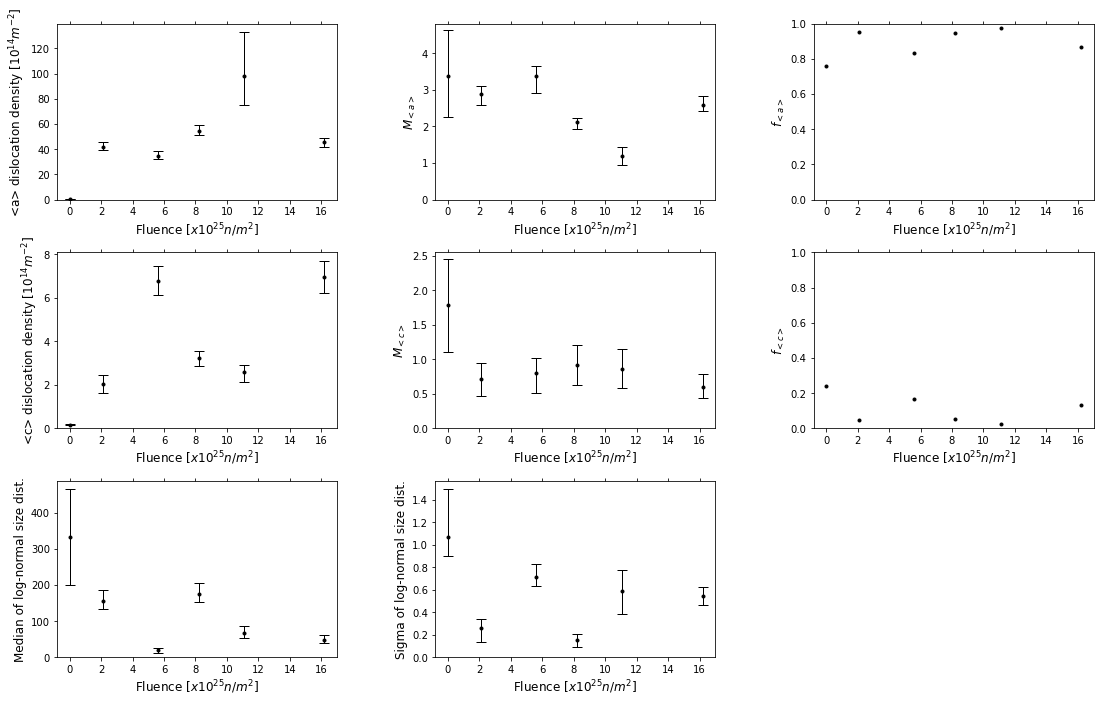

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(16,10))
fig.subplots_adjust(left=0.06, right=0.96, top=0.98, bottom=0.1, hspace=0.3, wspace = 0.35)
axes = axes.ravel()


# Common settings for all axes
for sax in axes:
    sax.tick_params(axis='both', which='major', labelsize=10)
    sax.xaxis.set_ticks_position('both')
    sax.set_xlabel('Fluence [$x 10^{25} n/m^2$]', fontsize=12)
    sax.set_ylabel('', fontsize=12)

#### dislocation density

axes[0].errorbar(x=data_df['fluence'], y=data_df['d'], yerr = [data_df['d_neg'],data_df['d_pos']], 
                 marker='o',c='k',  ms=3, lw=0, elinewidth=1, capsize=5)
axes[0].set_ylabel('<a> dislocation density [$10^{14} m^{-2}$]', fontsize=12)
axes[0].set_ylim(0)

#### m

axes[1].errorbar(x=data_df['fluence'], y=np.exp(2)*data_df['e'], 
                 yerr = np.exp(2)*np.array([data_df['e_neg'],data_df['e_pos']]), 
                 marker='o',c='k',  ms=3, lw=0, elinewidth=1, capsize=5)

axes[1].set_ylabel('$M_{<a>}$', fontsize=12)
axes[1].set_ylim(0)

#### dislocation density

axes[3].errorbar(x=data_df['fluence'], y=data_df['d_1'], 
                 yerr = [data_df['d_1_neg'],data_df['d_1_pos']],  marker='o',c='k',  ms=3, lw=0, elinewidth=1, capsize=5)
axes[3].set_ylabel('<c> dislocation density [$10^{14} m^{-2}$]', fontsize=12)
axes[3].set_ylim(0)

#### m
axes[4].errorbar(x=data_df['fluence'], y=np.exp(2)*data_df['e_1'], 
                 yerr = np.exp(2)*np.array([data_df['e_1_neg'],data_df['e_1_pos']]), 
                 marker='o',c='k',  ms=3, lw=0, elinewidth=1, capsize=5)


axes[4].set_ylabel('$M_{<c>}$', fontsize=12)
axes[4].set_ylim(0)

#### a loop fraction
data_df['a_frac'] = data_df['d']/(data_df['d']+data_df['d_1'])
data_df.plot(ax=axes[2], x='fluence', y='a_frac', ms=3, marker='o', c='k', lw=0,  legend=False, 
             xlabel='Fluence [$x 10^{25} n/m^2$]', ylabel='$f_{<a>}$', ylim=(0,1))

#### c loop fraction
data_df['c_frac'] = data_df['d_1']/(data_df['d']+data_df['d_1'])
data_df.plot(ax=axes[5], x='fluence', y='c_frac', ms=3, marker='o', c='k', lw=0,  legend=False, 
             xlabel='Fluence [$x 10^{25} n/m^2$]', ylabel='$f_{<c>}$', ylim=(0,1))

### b
axes[6].errorbar(x=data_df['fluence'], y=data_df['b'], 
                 yerr = np.array([data_df['b_neg'],data_df['b_pos']]), 
                 marker='o',c='k',  ms=3, lw=0, elinewidth=1, capsize=5)

axes[6].set_ylabel('Median of log-normal size dist.', fontsize=12)
axes[6].set_ylim(0)

### c
axes[7].errorbar(x=data_df['fluence'], y=data_df['c'], 
                 yerr = np.array([data_df['c_neg'],data_df['c_pos']]), 
                 marker='o',c='k',  ms=3, lw=0, elinewidth=1, capsize=5)

axes[7].set_ylabel('Sigma of log-normal size dist.', fontsize=12)
axes[7].set_ylim(0)

axes[8].axis('off')

plt.show()
fig.savefig('/home/rhys/Dropbox (Research Group)/BOR60.pdf', dpi=600)
    